# Python for (open) Neuroscience

_Lecture 0.0.0 - Introduction to Python_

Luigi Petrucco


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/lectures/Lecture0.0.0_Introduction.ipynb)

## Lecture outline

 - Course organization business
 - General introduction to Python
 - Introduction to Python syntax
 - Variables and types

## Teaching Assistants

Colleagues and course _alumni_ will help me with the course!

My gratitude in advance to:
- Jean-Charles Mariani _aka_ JC
- Luca Betteto
- Matteo De Matola
- Silvia Gini
- Martina Mancano
- Matilde Perrino

### Time and location

**Time**: 
 - Always current time unless someone would like to shift
 - Let me know if you have PhD school-related issues!

**Location:**
- This hall for all the frontal lectures
- Manifattura for the "office hours" at the end of each module

### Material and platforms

- Material (lectures, exercises...) will always be accessible at https://github.com/vigji/python-cimec-2024

- Lectures material and assignments will be in the form of Jupyter Notebooks

**Platforms:**
- **Google Colab** for the first part (online, no installation required)
- **Local Python installation** for the second part (you'll get instructions)

**Required accounts:**
- **Google** account for Google Colab
- **GitHub** account for exercises 

...a chat? Whatsapp group?

### Course organization

- The course will be organized in four modules. 
- Each module: 4-5 x lectures (2h) and 1 x office hours (2h)
- Each lecture: frontal lecture + hands-on (peer) coding

### Syllabus

Full syllabus at https://github.com/vigji/python-cimec-2024

- module 0: the fundamentals
- module 1: the scientific stack
- module 2: Python for neuroscientific data
- module 3: optional lectures on different topics based on interest

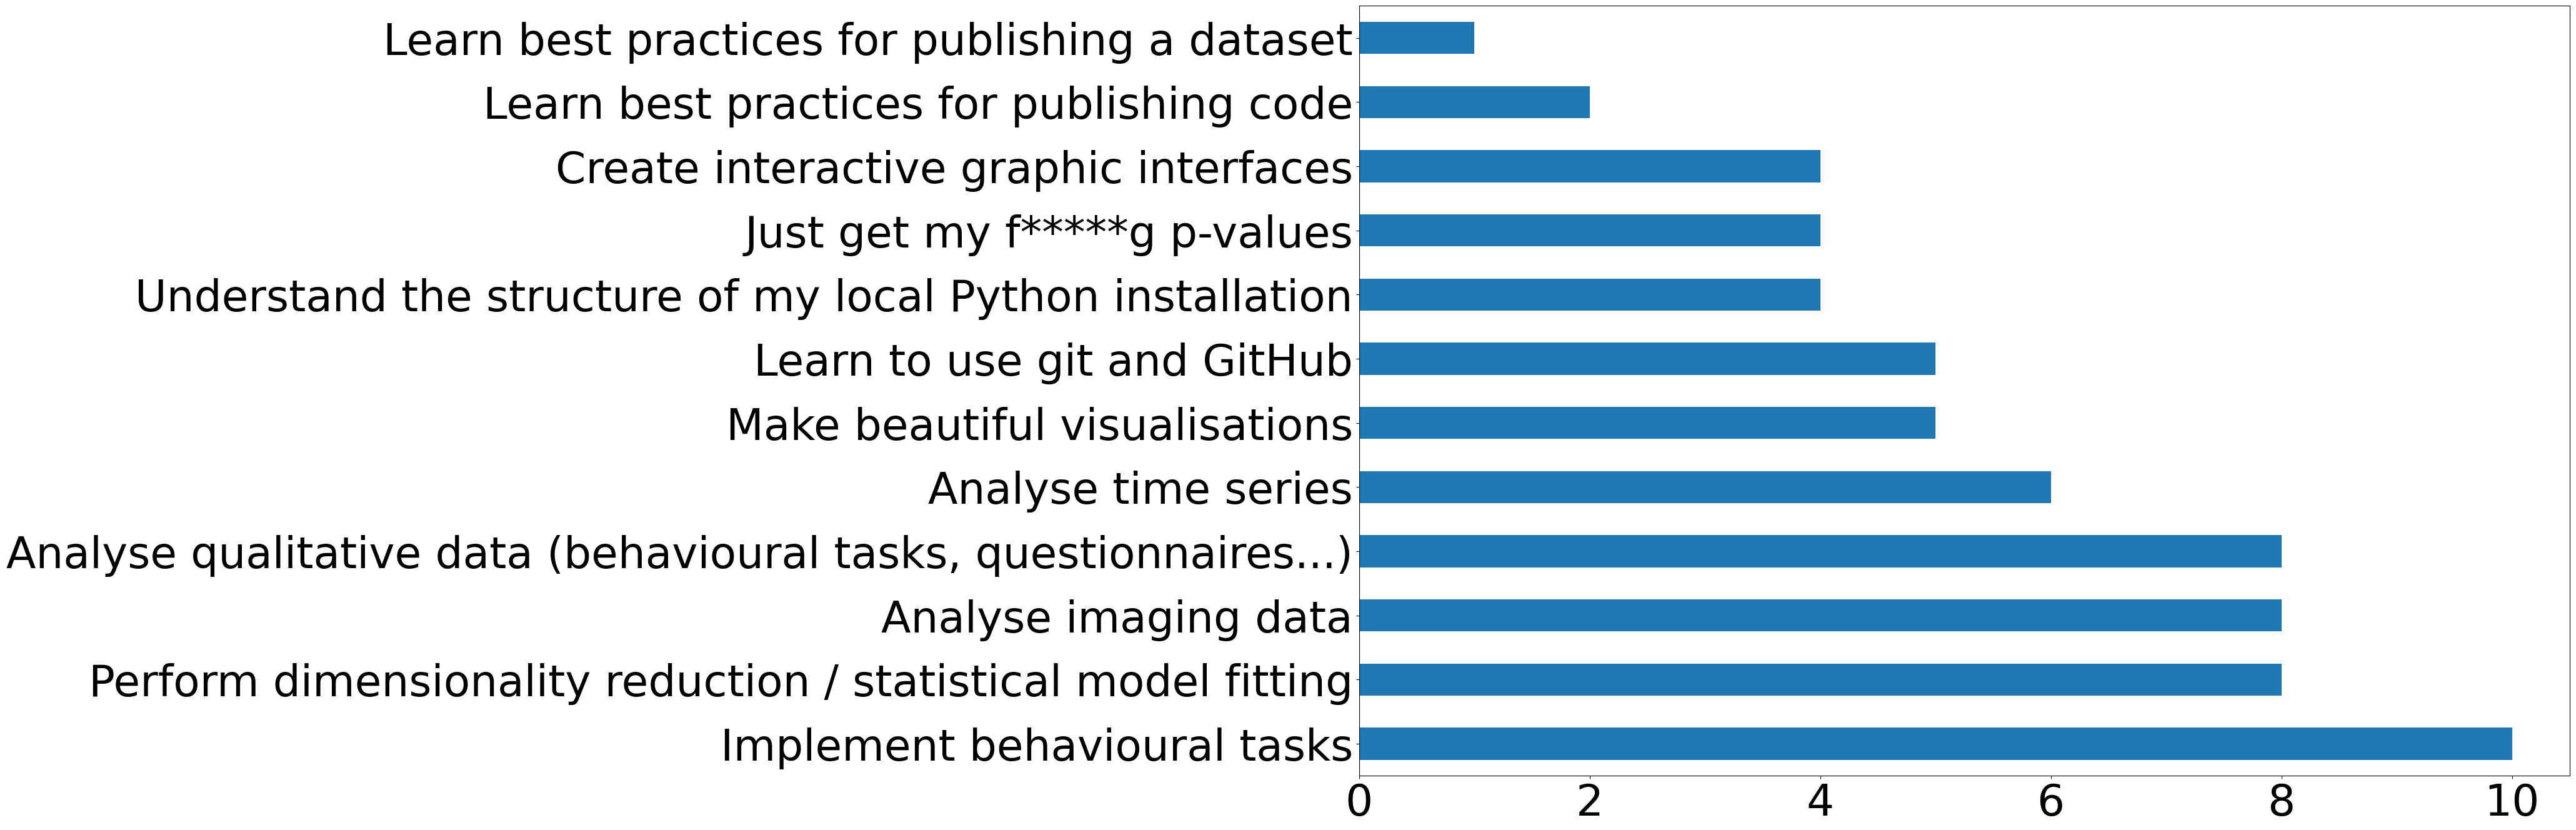

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("files/questionnaire2024.csv")  # read file

choices = df["I would really like to learn how to...(max 3 answers)"]
answers_counts = pd.Series(";".join(choices).split(";")).value_counts()  
plt.figure()
answers_counts.plot(legend=False, kind="barh", figsize=(25, 16), fontsize=50)
plt.show()

**Assignments**:
- Short assignments at the end of each module (coding exercises)
- Final assignment: real-world project using Python for your work

### Goals of the course

Learn the basics of Python - lingo and conceptual framework more than memorizing syntax!

You won't know everything but you'll now how to keep learning

Ideally, develop a bit of taste for coding!

### From zero to hero

My aim to to get you to a point where you can start moving your analysis to Python

### Feedback

- Bored faces will be monitored in real time

- There will be a brief mid-course anonymous questionnaire

- But feedbacks and suggestions are welcome any time!

### Students starting levels

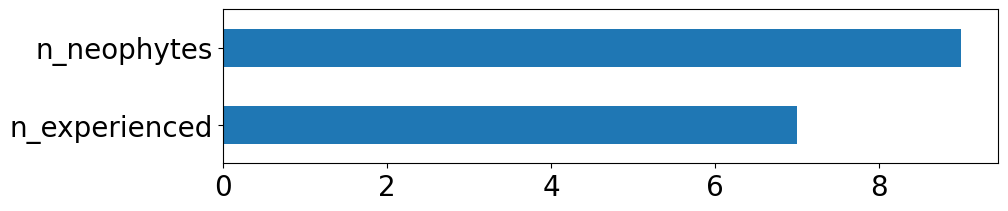

In [2]:
n_students = len(df)
n_neophytes = sum(df["Experience with Python:"] == "I do not know anything about Python")
answers_counts = pd.Series(dict(n_experienced=n_students-n_neophytes, n_neophytes=n_neophytes))

plt.figure()
answers_counts.plot(legend=False, kind="barh", figsize=(10, 2), fontsize=20)
plt.show()

We will try to go slowly - if you don't understand something, it's likely my fault  ü¶•

Please help me and ask!

And now, without further ado..


...What is Python?

### Python

<span style="color:indianred">General purpose</span>, <span style="color:indianred">high level</span> programming language  

Created in the early '90s by Guido van Rossum

Open-source + wide adoption --> massive number of open-source libraries

Named after the Monty Python's Flying Circus British TV show (not the animal)

![Monty Python meme](https://media.giphy.com/media/TVupcr33Jpg7C/giphy.gif)

### General purpose language

- wide range of applications (science, web, desktop applications, games, business...)
- support object-oriented programming, but also functional programming (arcane words that will soon make sense)
- used literally anywhere: Google, NASA, Meta, Reddit, Netflix, JP Morgan, Pixar...

### High level language

- Python (like MATLAB or R) is an <span style="color:indianred">interpreted language</span>
- Opposed to e.g. C, which is a <span style="color:indianred">compiled language</span>

**Compiled language**: all the instructions of the program are translated in assembly code (the computer language) before usage
 - slow to compile, but fast to run
 - generally, less user-friendly and harder to debug
 - code has to be compiled on every different machine

**Interpreted language**: each line of code is sent to an <span style="color:indianred">interpreter</span> that send instructions to the processor (using compiled code) and gives the response back
 - much slower than compiled code
 - user friendly and easier to interact with
 - code works across platforms

### Massive number of packages

 - very large (and quite geek) community
 - literally tens of thousands of packages to do pretty much anything...

...included plotting geek comics:

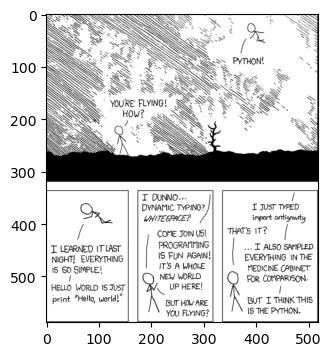

In [3]:
# Show geek comics:
import xkcd
from imageio.v2 import imread
from matplotlib import pyplot as plt

link = xkcd.Comic(353).getImageLink()  # get image link from number
plt.figure(figsize=(4, 4))  # plot image
plt.imshow(imread(link), cmap="gray")
plt.show()

### Comparison with R and MATLAB

**MATLAB**:
 - heavily engineering-oriented in the original design
 - much more focused on efficient numerical computation than statistics (eg, no smart data structures)
 - less versioning problems, but also never evolving
 - **not open-source**!

**R**:
 - have not really tried, so can't speak too much
 - overall, more focused on statistics: very good libraries for statistical models, Bayesian analyses, bioinformatics...
 - more restricted in scope than Python

### Python: a _lingua franca_

As of 2023 Python can be considered the English of programming languages

You can get pretty much everywhere around computers just talking Python!

### An additional Python strength: APIs

Many, many tools and websites offer Python <span style="color:indianred">APIs</span> (Application Programming Interfaces). With APIs we can:
 - download data from servers
 - publish content online
 - interact with other software / databases in our lab
 - build programs that do things in the world (read frames from cameras/sensors, control hardware, etc.)

A small example:

In [4]:
import wikipedia

wikipedia.summary("Rovereto", sentences=1)

'Rovereto (Italian pronunciation: [roveÀàreÀêto]; "wood of sessile oaks"; locally: Roveredo) is a city and comune in Trentino in northern Italy, located in the Vallagarina valley of the Adige River.'

`‚ö†Ô∏è Wildly speculative ‚ö†Ô∏è`

With the advent of language models and code generators, this could become increasingly important in the future!

Eg, great integration of OpenAI models such as GPT within Python:

In [5]:
import openai

openai.api_key_path = "/Users/vigji/openai.txt"  # works only with OpenAI credentials

messages = [
    {
        "role": "user",
        "content": "Send a small limerick to a class starting a Python course",
    }
]

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo", max_tokens=40, temperature=1.2, messages=messages
)["choices"][0]["message"]["content"]
print(response)

There once was a class learning Python,
Their coding skills sharp and undying,
With loops and functions,
And debugging deductions,
Their programming prowess was truly awe-inspiring!


### The phylosophy of Python

Around the Python community there are many (weird people) computer scientists and an interesting aesthetics. There is a  <span style="color:indianred">pythonic</span> way of approaching problems.

Difficoult to express rationally and takes time to be learned - but gives an additional layer or reward!

### The Zen of Python

In [6]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
